# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [5]:
# Import numpy and pandas

! pip3 install pmdarima

In [1]:
from pmdarima.arima import auto_arima
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import ADFTest
import matplotlib.pyplot as plt


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


In [4]:
sensor.dtypes

attitude.roll         float64
attitude.pitch        float64
attitude.yaw          float64
gravity.x             float64
gravity.y             float64
gravity.z             float64
rotationRate.x        float64
rotationRate.y        float64
rotationRate.z        float64
userAcceleration.x    float64
userAcceleration.y    float64
userAcceleration.z    float64
dtype: object

Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
# Your code here:
sensor_null_col = sensor.isnull().sum().apply(lambda x: x/sensor.shape[0]).sort_values(ascending=False)
sensor_null_col
# There are not null values


userAcceleration.z    0.0
userAcceleration.y    0.0
userAcceleration.x    0.0
rotationRate.z        0.0
rotationRate.y        0.0
rotationRate.x        0.0
gravity.z             0.0
gravity.y             0.0
gravity.x             0.0
attitude.yaw          0.0
attitude.pitch        0.0
attitude.roll         0.0
dtype: float64

How many rows and columns are in our data?

In [6]:
# Your code here:
sensor.shape
# We have 1751 rows and 12 columns

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [4]:
# Your code here:

sensor["date"] = pd.date_range("1/1/2018 00:00:00", "1/1/2018 00:29:10", 1751)
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,date
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


Assign the time series index to the dataframe's index.

In [5]:
# Your code here:

sensor = sensor.set_index("date")
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
date,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

<ipython-input-9-b08adb5944b7>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(sensor["userAcceleration.x"], freq = 60)


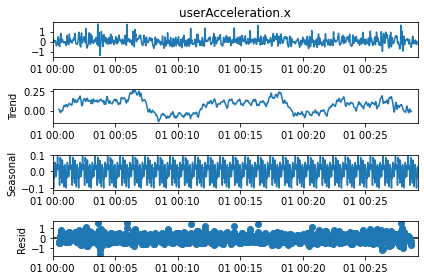

In [9]:
# Your code here:
res = seasonal_decompose(sensor["userAcceleration.x"], freq = 60)
res.plot();


<ipython-input-10-467776a636f4>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(sensor["rotationRate.x"], freq = 60)


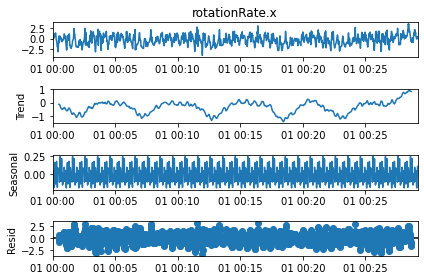

In [10]:
#Plot the decomposed time series of rotationRate.x also with a frequency of 60.

res = seasonal_decompose(sensor["rotationRate.x"], freq = 60)
res.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

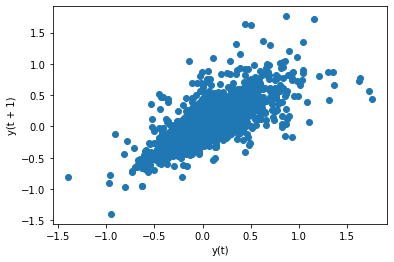

In [11]:
# Your code here:
pd.plotting.lag_plot(sensor["userAcceleration.x"], lag=1)
# After reading, I can conclude that there is a moderate correlation in userAcceleration.x

Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

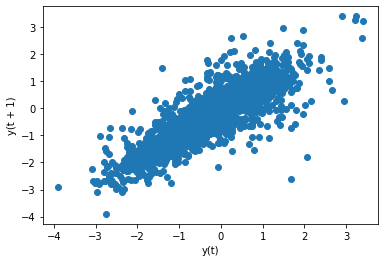

In [12]:
# Your code here:
pd.plotting.lag_plot(sensor["rotationRate.x"], lag=1)
# After reading, I can conclude that there is a moderate correlation in rotationRate.x

What are your conclusions from both visualizations?

In [11]:
# Your conclusions here:
# After reading documentation, I can conclude that there is a moderate correlation in both rotationRate.x and userAcceleration.x
#because we obtein a linear plot. And because of the slope, I can conclude is a positive correlation.
# Datas are concentrate on the diagonal and this means we have correlation.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [16]:
# Your code here:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sensor["userAcceleration.x"])

(0.01, False)

In [15]:
# Your code here:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sensor["rotationRate.x"])


(0.01, False)

What are your conclusions from this test?

In [13]:
# Your conclusions here:
#As we have seen in clas, it is Falso so, there are not stationarity

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

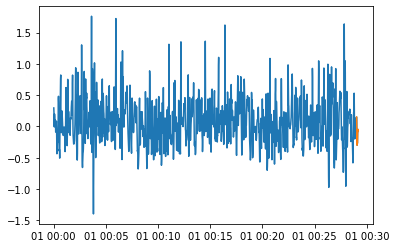

In [6]:
train = sensor["userAcceleration.x"][:17415]
test = sensor["userAcceleration.x"][-10:]

plt.plot(train)

plt.plot(test)

In [8]:
#As we saw in class
arima_model =  auto_arima(train,start_p=2, d=0, start_q=1, 
                          max_p=3, max_d=3, max_q=3, start_P=2, 
                          D=0, start_Q=1, max_P=3, max_D=3,
                          max_Q=3, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=-744.477, Time=6.23 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1232.882, Time=0.22 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-272.021, Time=0.53 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-142.933, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1287.839, Time=0.08 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=-746.159, Time=2.70 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=-747.263, Time=1.00 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=-748.798, Time=0.53 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=-747.278, Time=0.74 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-670.537, Time=0.49 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=-736.784, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[12] intercept   : AIC=-746.801, Time=0.88 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-746.819, Time=1.21 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-271.406, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0

In [9]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 10),index=test.index)
prediction.columns = ['predicted_sensor']
prediction

,predicted_sensor
date,
2018-01-01 00:29:01,-0.035047
2018-01-01 00:29:02,0.014357
2018-01-01 00:29:03,0.051858
2018-01-01 00:29:04,0.070226
2018-01-01 00:29:05,0.074183
2018-01-01 00:29:06,0.071139
2018-01-01 00:29:07,0.066629
2018-01-01 00:29:08,0.063324
2018-01-01 00:29:09,0.061763


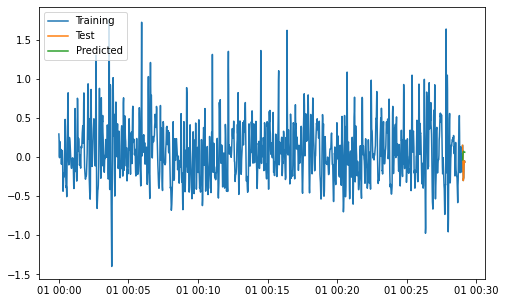

In [10]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [11]:
# With statsmodel ARMA
from statsmodels.tsa.arima.model import ARMA
# Deprecated since version 0.12: Use statsmodels.tsa.arima.model.ARIMA instead

MODEL = ARMA(train, order = (2,1), exog=None, dates=None, freq=None, missing='none')
MODEL

ImportError: cannot import name 'ARMA' from 'statsmodels.tsa.arima.model' (C:\Users\mdiez\anaconda\lib\site-packages\statsmodels\tsa\arima\model.py)

In [12]:
# With statsmodel ARIMA
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order = (2,0,1))
model = model.fit()

C:\Users\mdiez\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
C:\Users\mdiez\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'
C:\Users\mdiez\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  warnings.warn('No frequency information was'


In [13]:
prediction = pd.DataFrame(model.predict(n_periods = 10),index=test.index)
prediction.columns = ['predicted_sensor']
prediction

,predicted_sensor
date,
2018-01-01 00:29:01,0.172773
2018-01-01 00:29:02,0.115157
2018-01-01 00:29:03,-0.008273
2018-01-01 00:29:04,-0.186763
2018-01-01 00:29:05,-0.229210
2018-01-01 00:29:06,-0.136439
2018-01-01 00:29:07,-0.162654
2018-01-01 00:29:08,0.035720
2018-01-01 00:29:09,-0.043528


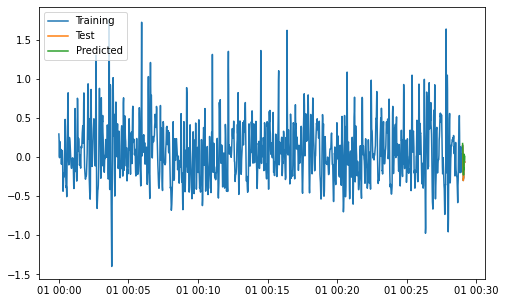

In [14]:
# Your code here:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [15]:
from statsmodels.tools.eval_measures import rmse

rmse = rmse(prediction, test)
rmse

array([0.23095053, 0.15071479, 0.17832472, 0.28633587, 0.25959694,
       0.25802048, 0.13956101, 0.13331836, 0.12657784, 0.12831263])

In [16]:
test

date
2018-01-01 00:29:01    0.149749
2018-01-01 00:29:02    0.038461
2018-01-01 00:29:03   -0.169175
2018-01-01 00:29:04   -0.300361
2018-01-01 00:29:05   -0.270174
2018-01-01 00:29:06   -0.268367
2018-01-01 00:29:07   -0.102444
2018-01-01 00:29:08   -0.085590
2018-01-01 00:29:09   -0.048105
2018-01-01 00:29:10   -0.065011
Name: userAcceleration.x, dtype: float64

In [17]:
prediction

,predicted_sensor
date,
2018-01-01 00:29:01,0.172773
2018-01-01 00:29:02,0.115157
2018-01-01 00:29:03,-0.008273
2018-01-01 00:29:04,-0.186763
2018-01-01 00:29:05,-0.229210
2018-01-01 00:29:06,-0.136439
2018-01-01 00:29:07,-0.162654
2018-01-01 00:29:08,0.035720
2018-01-01 00:29:09,-0.043528
